# Our Team

- **Christian** - [Christian-Chrata](https://github.com/Christian-Chrata)  
- **Eric** - [henrikuseric](https://github.com/henrikuseric)  
- **Jessica** - [Jessimandaris](https://github.com/Jessimandaris)  
- **Sarah** - [sarahzeta03](https://github.com/sarahzeta03)  
- **Nadame** - [nadame7](https://github.com/nadame7)

# Pendahuluan
PT Sido Muncul adalah **perusahaan jamu dan herbal terkemuka di Indonesia** dengan pengalaman lebih dari **80 tahun**. Mengandalkan **bahan alami**, **inovasi**, dan **teknologi modern**, kami memproduksi **produk kesehatan berkualitas tinggi** yang telah dipercaya secara nasional dan internasional. Kami berkomitmen menciptakan **nilai jangka panjang bagi investor** melalui **pertumbuhan berkelanjutan**, **portofolio produk yang kuat**, dan **ekspansi pasar yang konsisten**, menjadikan investasi di Sido Muncul sebagai **langkah strategis menuju masa depan industri kesehatan berbasis alam**.

# Rumusan Masalah
Bagaimana model machine learning dapat digunakan untuk membantu pengambilan keputusan buy, sell, dan hold secara objektif dan berbasis data?

# Import Modul

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [42]:
df=pd.read_csv('input/sido.csv')
df['Date']=pd.to_datetime(df['Date'])

df=df.sort_values(by="Date")
df=df.reset_index().drop(columns="index")
df['Price']=df['Price'].astype(int)

df=df[["Date", "Price"]]
df.columns=["ds","y"]

df.set_index('ds', inplace=True)

# Exploratory Data Analysis (EDA)

In [45]:
summary = {
    'Rata-rata Harga Saham': df['y'].mean(),
    'Harga Minimum': df['y'].min(),
    'Harga Maximum': df['y'].max(),
    'Harga Kuartil 1': df['y'].quantile(0.25),
    'Median Harga': df['y'].median(),
    'Harga Kuartil 3': df['y'].quantile(0.75),
    'Standard Deviation': df['y'].std()

}

eda = pd.DataFrame(summary, index=['Nilai']).T
eda.columns = ['Harga (Rp)']

eda['Harga (Rp)'] = eda['Harga (Rp)'].map(lambda x: f"Rp{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

display(eda)

,Harga (Rp)
Rata-rata Harga Saham,"Rp264,62"
Harga Minimum,"Rp220,00"
Harga Maximum,"Rp308,00"
Harga Kuartil 1,"Rp252,00"
Median Harga,"Rp262,00"
Harga Kuartil 3,"Rp278,00"
Standard Deviation,"Rp15,46"


# Model LSTM

## Scaller

In [49]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['y']])

In [51]:
def create_sequences(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

## Split

In [54]:
look_back = 20
X, y = create_sequences(scaled, look_back)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model

In [57]:
model_lstm = Sequential([
    LSTM(128, return_sequences=True, activation='tanh', input_shape=(look_back, 1)),
    Dropout(0.15),
    LSTM(64, activation='tanh'),
    Dropout(0.15),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0826
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0137
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0115
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0097
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0106
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - los

## Prediction

In [59]:
y_pred = model_lstm.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSE: 4.24, MAE: 3.45


In [60]:
test_dates = df.index[look_back + split:]
y_pred_inv_flat = y_pred_inv.flatten()

# Combine into a DataFrame
lstm_df = pd.DataFrame({
    'ds': test_dates,
    'y': y_pred_inv_flat
})

lstm_df.set_index('ds', inplace=True)

## Forecast 2017-04-29 until 2017-07-30

In [62]:
start_date = pd.to_datetime("2017-04-28")
end_date = pd.to_datetime("2017-07-30")
n_future_days = (end_date - start_date).days + 1

last_window = scaled[-look_back:].reshape(1, look_back, 1)

future_preds_scaled = []
for _ in range(n_future_days):
    next_pred = model_lstm.predict(last_window)[0]
    future_preds_scaled.append(next_pred)
    
    last_window = np.append(last_window[:, 1:, :], [[next_pred]], axis=1)

future_preds = scaler.inverse_transform(future_preds_scaled).flatten()

future_dates = pd.date_range(start=start_date, periods=n_future_days)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

In [63]:
future_df = pd.DataFrame({
    'ds': future_dates,
    'y': future_preds
})

future_df.set_index('ds', inplace=True)

future_df

,y
ds,
2017-04-28,277.683758
2017-04-29,275.993248
2017-04-30,274.587354
2017-05-01,273.255559
2017-05-02,271.970745
...,...
2017-07-26,249.479744
2017-07-27,249.464714
2017-07-28,249.450360


# Overall Visualization

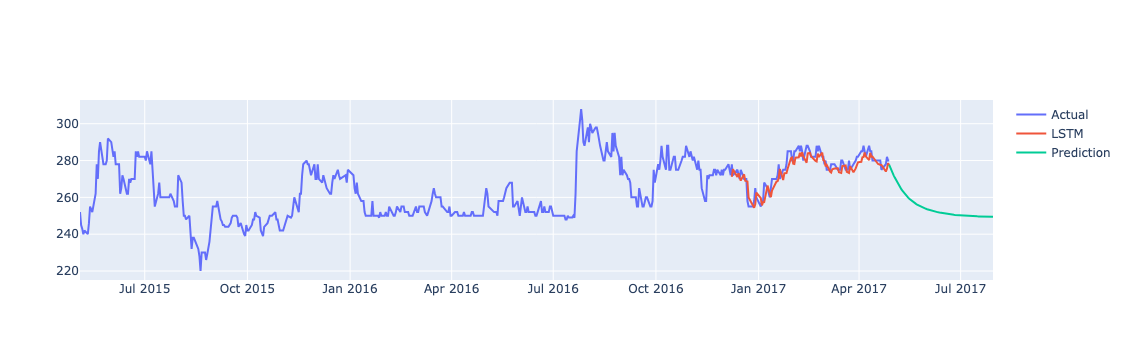

In [65]:
fig=go.Figure([go.Scatter(name='Actual',x=df.index,y=df['y'])])
fig.add_trace(go.Scatter(name='LSTM',x=lstm_df.index,y=lstm_df["y"]))
fig.add_trace(go.Scatter(name='Prediction',x=future_df.index,y=future_df["y"]))
fig.show()

# Rekomendasi
1. **When to Buy and Sell**
   - Strategi Jual (SELL): Jika saat ini harga saham berada di atas Rp 270–280, disarankan untuk menjual karena model memprediksi harga akan turun dan stagnan.
   - Strategi Beli (BUY): Jika harga sudah turun dan mendekati Rp 260–265, ini bisa menjadi waktu yang tepat untuk membeli saham, karena harga diprediksi akan stabil.

1. **Model**
   - Gunakan Prediksi sebagai Pendukung, Bukan Satu-satunya Acuan: Prediksi LSTM cukup akurat, tapi tetap perlu digabungkan dengan analisis fundamental dan berita pasar terkini.

# Export

In [68]:
df_actual = df.rename(columns={'y': 'actual'})
df_lstm = lstm_df.rename(columns={'y': 'lstm_test'})
df_future = future_df.rename(columns={'y': 'lstm_forecast'})

merged = pd.merge(df_actual, df_lstm, on='ds', how='outer')
merged = pd.merge(merged, df_future, on='ds', how='outer')

merged = merged.sort_values('ds').reset_index()

merged.to_csv('output/canva.csv', index=False)

display(merged)

,ds,actual,lstm_test,lstm_forecast
0,2015-05-04,252.0,NaN,NaN
1,2015-05-05,245.0,NaN,NaN
2,2015-05-06,243.0,NaN,NaN
3,2015-05-07,240.0,NaN,NaN
4,2015-05-08,242.0,NaN,NaN
...,...,...,...,...
574,2017-07-26,NaN,NaN,249.479744
575,2017-07-27,NaN,NaN,249.464714
576,2017-07-28,NaN,NaN,249.450360
577,2017-07-29,NaN,NaN,249.436654
